# Load modules and Set constants

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os, cv2, glob, zipfile
import numpy as np
import pandas as pd
import pickle as pkl

import matplotlib.pyplot as plt

In [3]:
WIDTH, HEIGHT = 256, 256

EXPERIMENT_DATA = {
    'name' : 'Trajectory_Clusetring',
    'number' : '35',
    'date' : '09-02-2021',
    'description' : 'Check geolife has same trajectory'
    }

ROOT_DIR = os.path.join('/content')

BITMAP_DIR = os.path.join(ROOT_DIR, 'Bitmap')
IMAGE_DIR = os.path.join(ROOT_DIR, 'Image_Files')

EXPERIMENT_DIR = os.path.join(ROOT_DIR, 'drive', 'MyDrive', '1_University', 'PiLab', 'Experiment')
DATA_DIR = os.path.join(EXPERIMENT_DIR, 'Data')
RESULT_DIR = os.path.join(EXPERIMENT_DIR, 'Results')

os.chdir(RESULT_DIR)
curr_result_name = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}_{EXPERIMENT_DATA['date']}_Results"
if (curr_result_name not in os.listdir()):
    os.mkdir(curr_result_name)

CURR_RESULT_DIR = os.path.join(RESULT_DIR, curr_result_name)
os.chdir(CURR_RESULT_DIR)

with open('Description.txt', 'w') as f:
    f.write(EXPERIMENT_DATA['description'])

print(f'ROOT_DIR:        {ROOT_DIR}')
print(f'BITMAP_DIR:      {BITMAP_DIR}')
print(f'IMAGE_DIR:       {IMAGE_DIR}')
print(f'EXPERIMENT_DIR:  {EXPERIMENT_DIR}')
print(f'DATA_DIR:        {DATA_DIR}')
print(f'RESULT_DIR:      {RESULT_DIR}')
print(f'CURR_RESULT_DIR: {CURR_RESULT_DIR}')

ROOT_DIR:        /content
BITMAP_DIR:      /content/Bitmap
IMAGE_DIR:       /content/Image_Files
EXPERIMENT_DIR:  /content/drive/MyDrive/1_University/PiLab/Experiment
DATA_DIR:        /content/drive/MyDrive/1_University/PiLab/Experiment/Data
RESULT_DIR:      /content/drive/MyDrive/1_University/PiLab/Experiment/Results
CURR_RESULT_DIR: /content/drive/MyDrive/1_University/PiLab/Experiment/Results/Trajectory_Clusetring_35_09-02-2021_Results


# Load Data

In [4]:
os.chdir(ROOT_DIR)
zipfile.ZipFile(DATA_DIR + "/Image_Files.zip").extractall(ROOT_DIR)

In [6]:
os.chdir(IMAGE_DIR)
file_names = sorted(glob.glob('*png'))

In [7]:
trajectory_images = [ ]
for file in file_names:
    trajectory_images.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE))

NameError: ignored

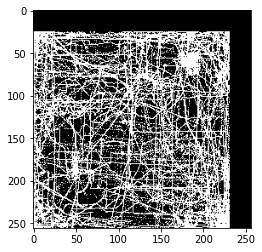

In [9]:
random_idx = np.random.randint(0, len(trajectory_images), size = 100)

sum_images = [[0 for _ in range(WIDTH)] for _ in range(HEIGHT)]
for idx in random_idx:
    for row in range(HEIGHT):
        for col in range(WIDTH):
            if (trajectory_images[idx][row][col] > 0):
                sum_images[row][col] = 255

time = 1

os.chdir(CURR_RESULT_DIR)
plt.gray()
plt.imshow(sum_images)
plt.savefig(f'{time}th random sum image.png', dpi = 1)
plt.show()

In [10]:
print(random_idx)

[ 6875  5629 13413 12454 12791  9885 13853 11760  7660  6387  6143  7386
  5726  9673 14160 10128  1134 17360  3350  3628   415  1692 13951 17041
  8236  4486 15936 11625  2117  4378 11681  7119  4854 11541 18454 18182
  8710  2508 11125 13716 16541  9747 18448 13311 14029  4148 14909 11992
 18451  5486 15985  6138 13288  5774  7462 17538 11366  7209 18615  8262
 17224  9939  3271  8352  2087 10371 10415 17607  6632  9689  2369  9498
 14842  2180  8871  7218  9811 17134   524  6109 13268  2401   792 18080
  9246  9344 15636  4473  2187   928 10347  2210  6011  3190  8037  2191
 17843  4782 12284  8476]


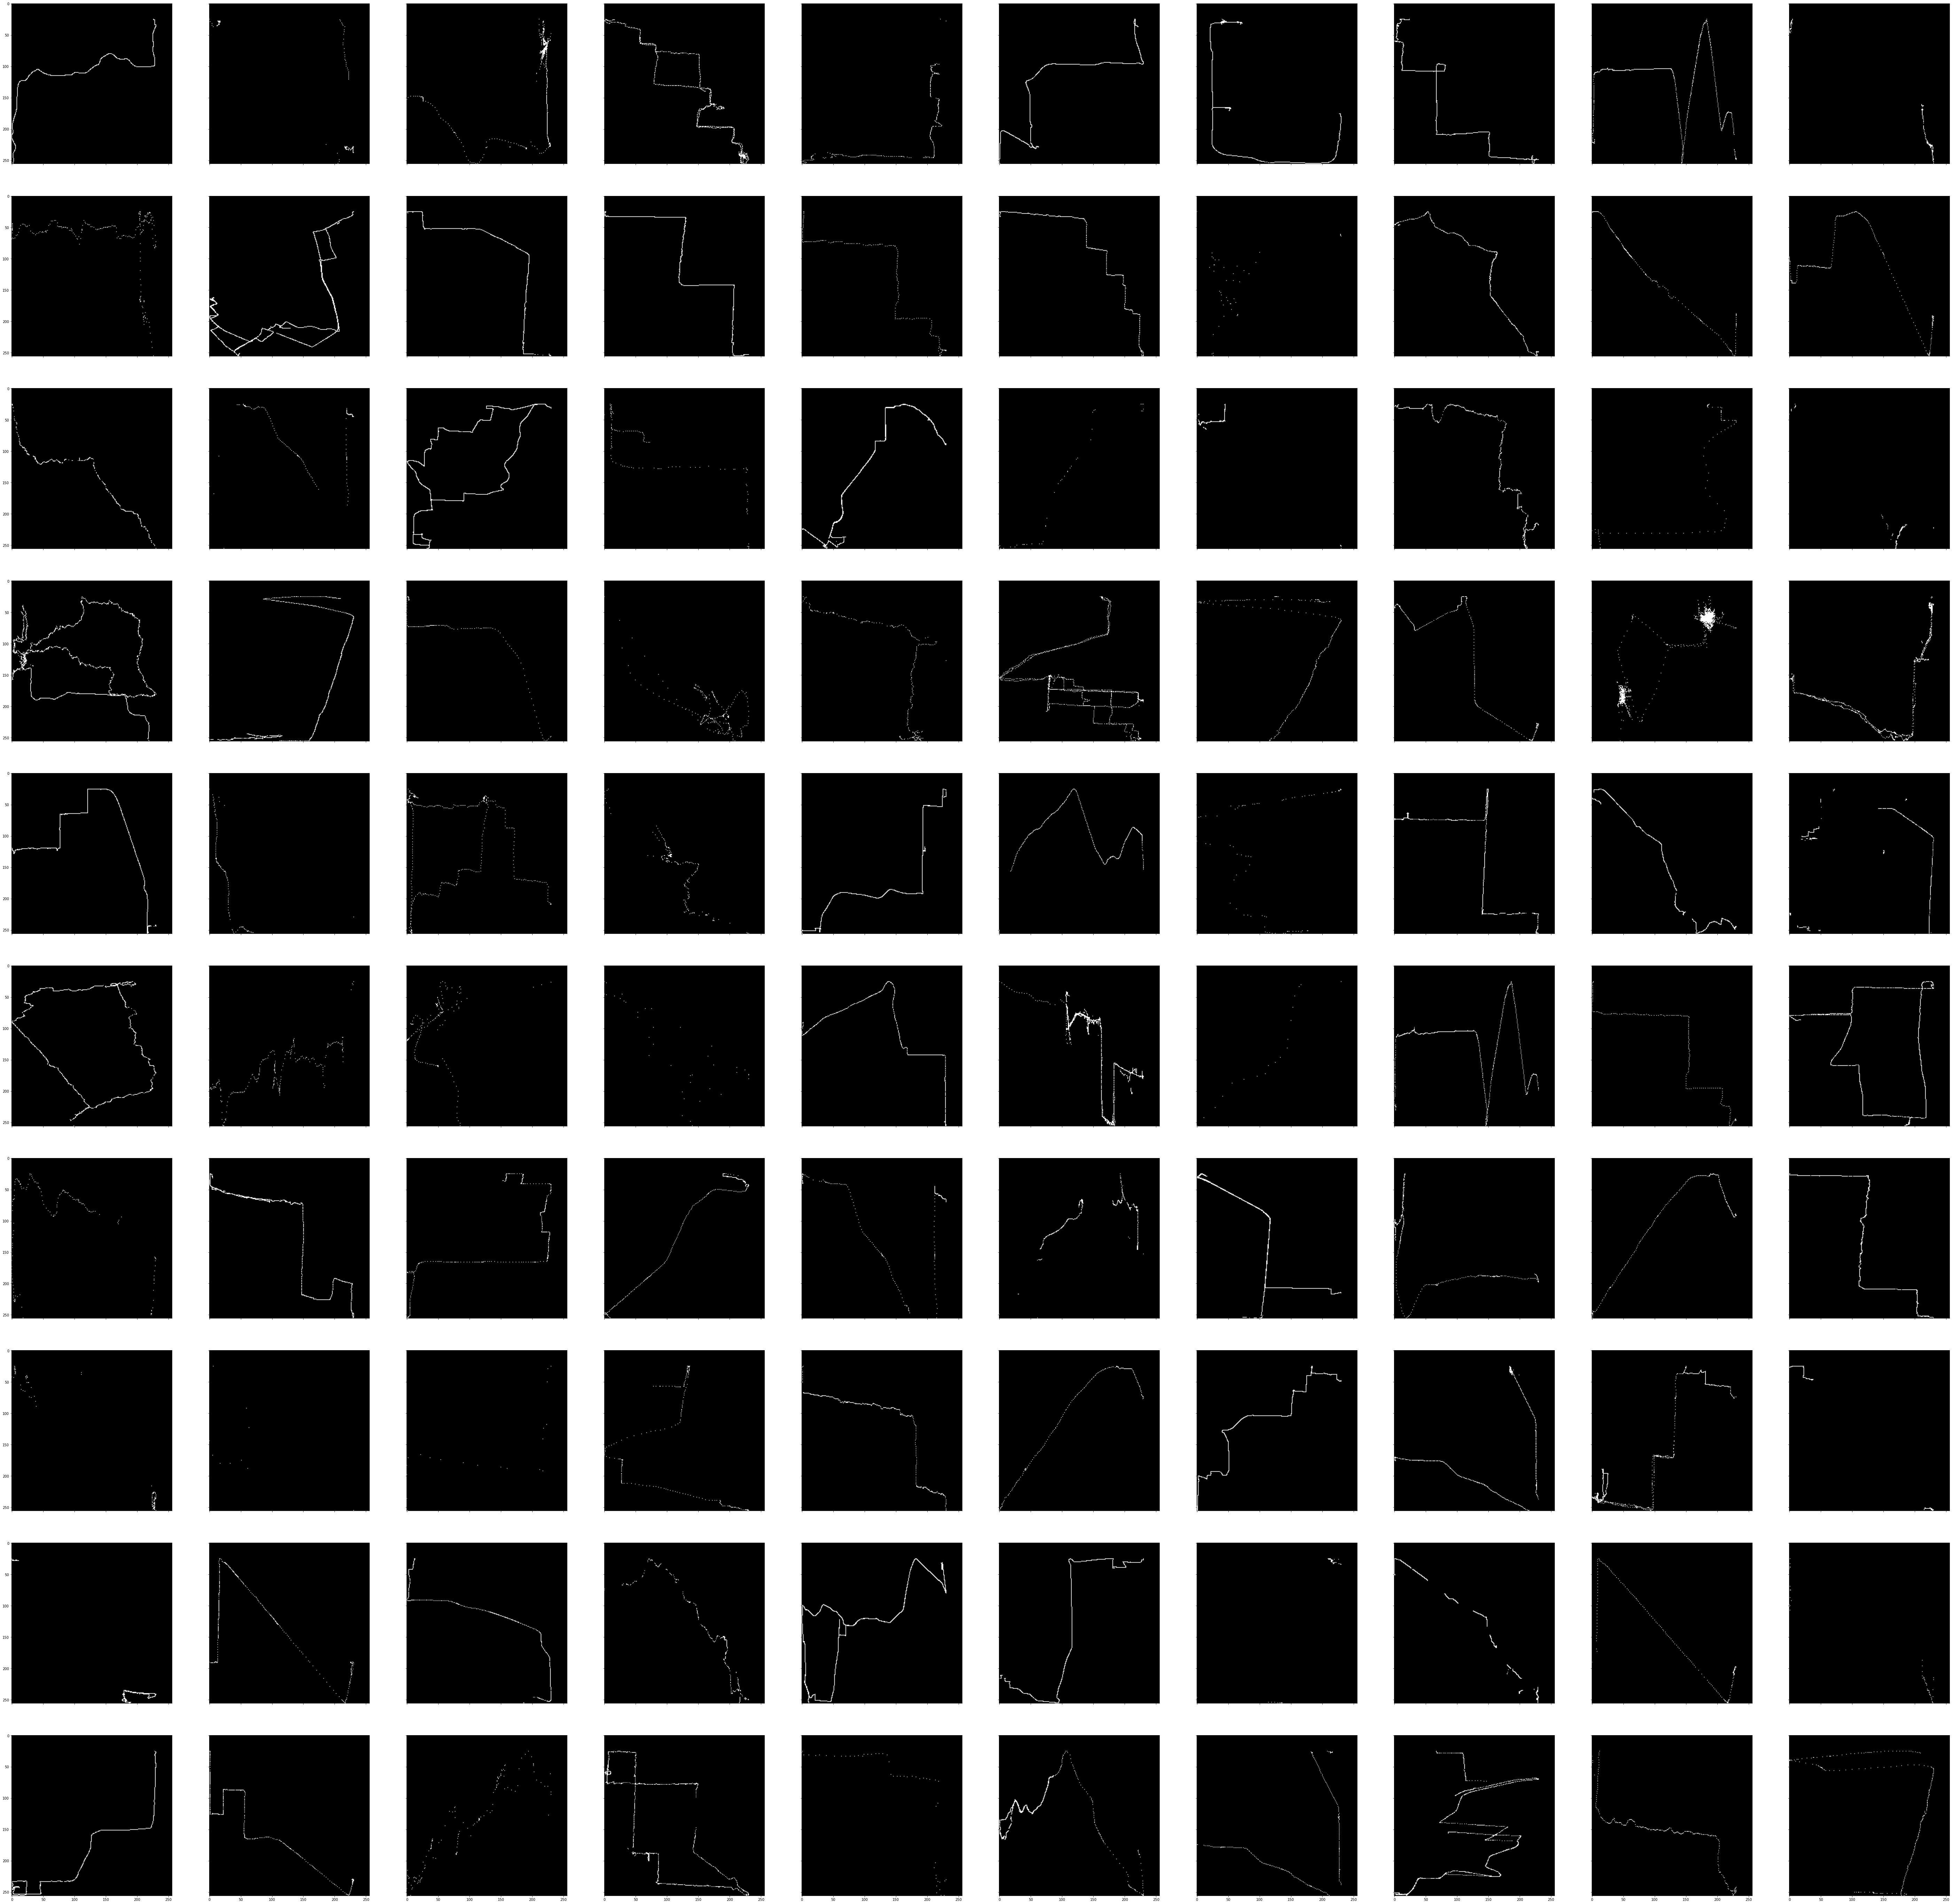

In [11]:
fig, ax = plt.subplots(10, 10, sharex = True, sharey = True, figsize = (100, 100))
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(trajectory_images[random_idx[i * 10 + j]])
plt.show()

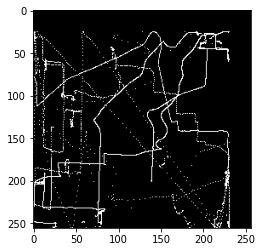

In [15]:
random_size = 10
random_idx = np.random.randint(0, len(trajectory_images), size = random_size)

time = 1
sum_images = [[0 for _ in range(WIDTH)] for _ in range(HEIGHT)]
for idx in random_idx:
    for row in range(HEIGHT):
        for col in range(WIDTH):
            if (trajectory_images[idx][row][col] > 0):
                sum_images[row][col] = 255

os.chdir(CURR_RESULT_DIR)
plt.gray()
plt.imshow(sum_images)
plt.savefig(f'{time}th random sum image.png', dpi = 300)
plt.show()

In [16]:
def plot_random_trajectories(trajectories, image_name, random_size = 10):
    random_idx = np.random.randint(0, len(trajectories), size = random_size)

    sum_images = [[0 for _ in range(WIDTH)] for _ in range(HEIGHT)]
    for idx in random_idx:
        for row in range(HEIGHT):
            for col in range(WIDTH):
                if (trajectories[idx][row][col] > 0):
                    sum_images[row][col] = 255

    plt.gray()
    plt.imshow(sum_images)
    plt.savefig(image_name, dpi = 300)

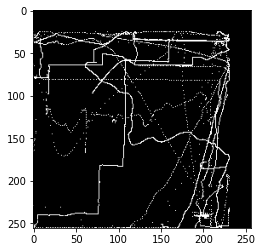

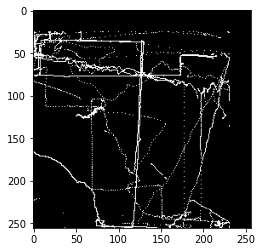

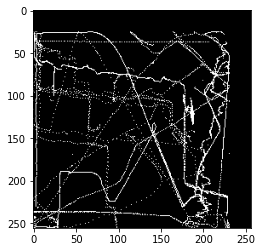

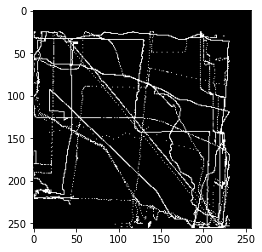

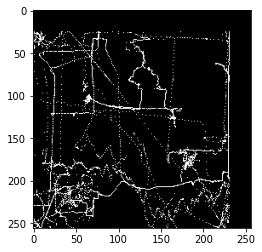

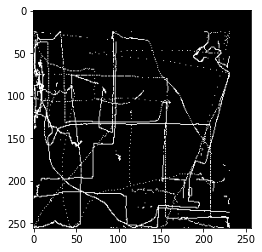

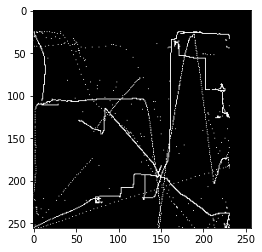

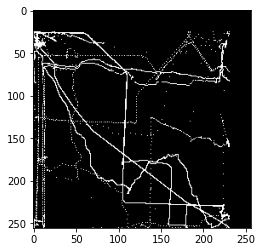

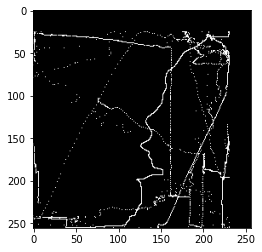

In [17]:
for i in range(2, 11):
    plot_random_trajectories(trajectory_images, f'{i}th sum image.png')

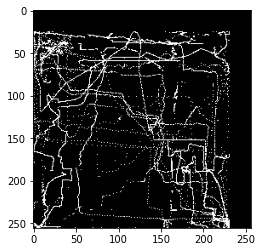

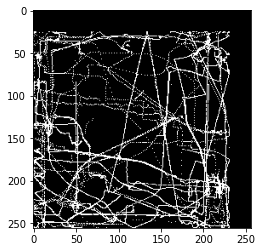

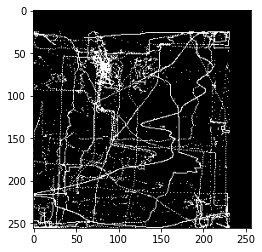

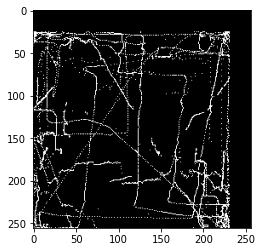

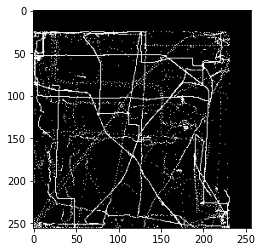

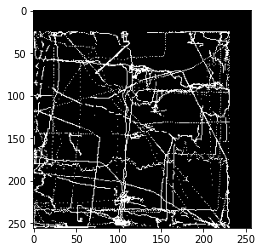

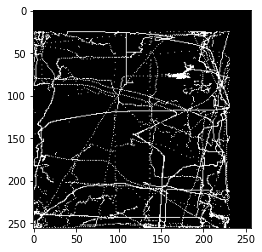

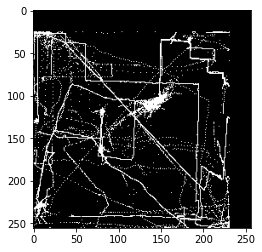

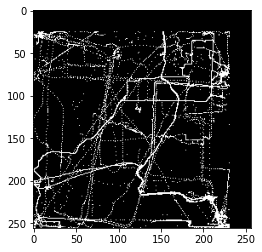

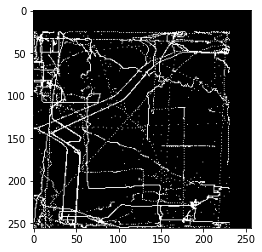

In [18]:
for i in range(1, 11):
    plot_random_trajectories(trajectory_images, f'{i}th random(20) sum image.png', 20)